In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 주식 데이터를 읽어온다.
cel = pd.read_csv('./data/samsung_stock.csv')
cel

,거래일,최고가,최저가,시작가,종가,거래량,수정종가
0,2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
1,2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.647461
2,2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
3,2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.129883
4,2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.812500
...,...,...,...,...,...,...,...
3092,2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.000000
3093,2022-08-16,61600.0,60300.0,60500.0,61000.0,15036727.0,61000.000000
3094,2022-08-17,61200.0,60300.0,61100.0,60400.0,9061518.0,60400.000000
3095,2022-08-18,61900.0,60000.0,60300.0,61500.0,16372754.0,61500.000000


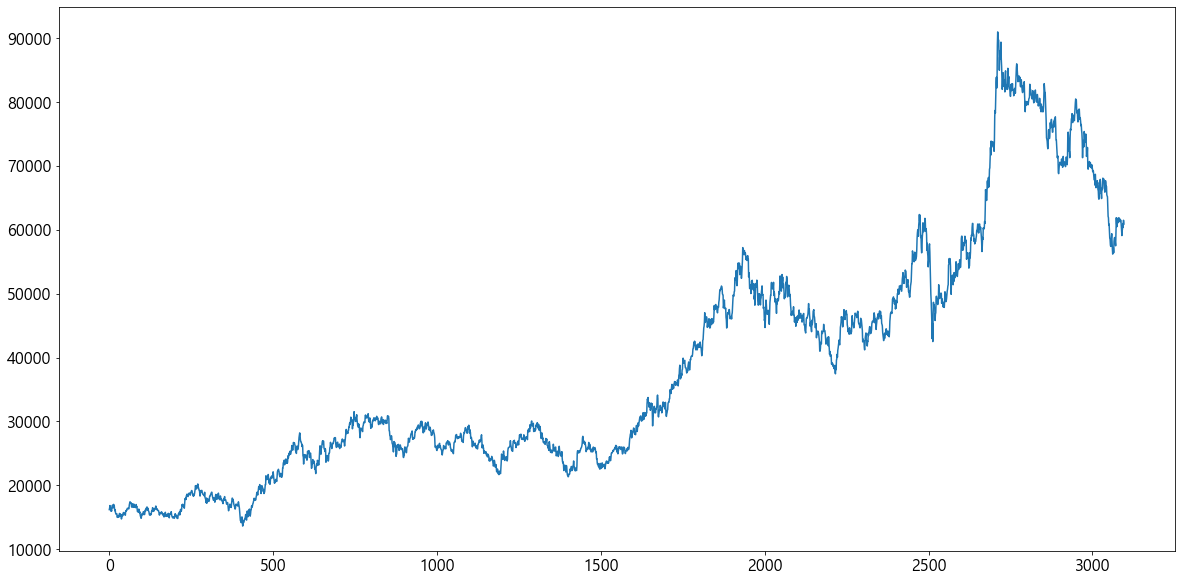

In [5]:
# 종가 시각화
plt.plot(cel['종가'])
plt.show()

### 등락폭 그래프

In [6]:
cel['종가']

0       16180.0
1       16440.0
2       16820.0
3       16260.0
4       16420.0
         ...   
3092    60200.0
3093    61000.0
3094    60400.0
3095    61500.0
3096    60900.0
Name: 종가, Length: 3097, dtype: float64

In [7]:
# diff : 이전 행의 결과와 비교하여 얼마나 등락을 했는지 계산한다.
# 처음것은 이전 것이 없기 때문에 결측치가 나온다.
a1 = cel['종가'].diff()
a1

0          NaN
1        260.0
2        380.0
3       -560.0
4        160.0
         ...  
3092     300.0
3093     800.0
3094    -600.0
3095    1100.0
3096    -600.0
Name: 종가, Length: 3097, dtype: float64

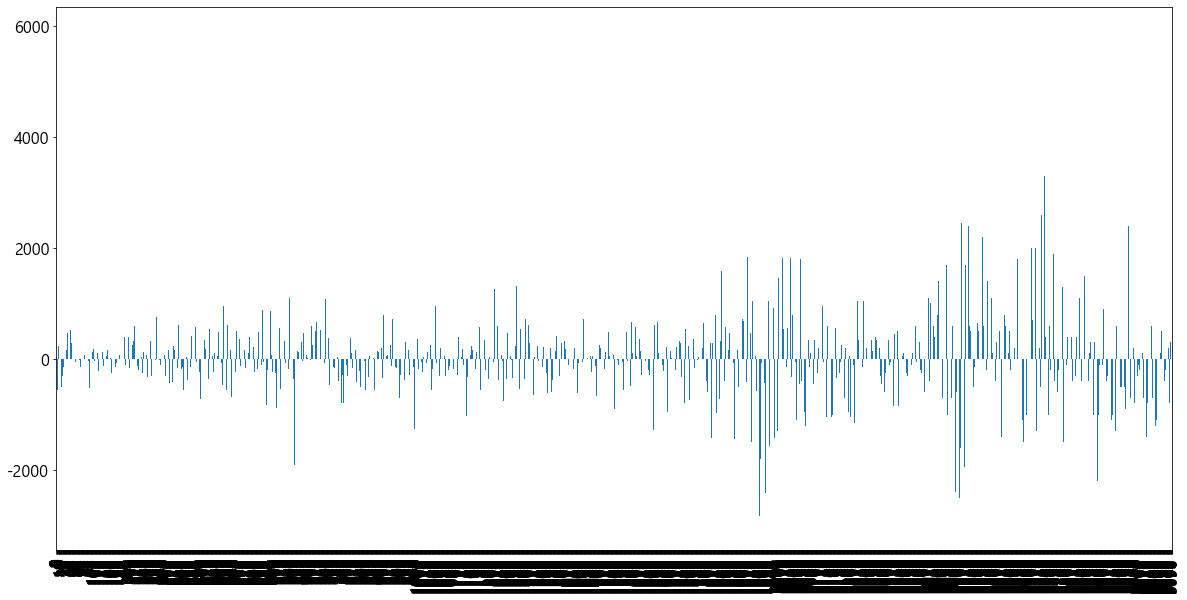

In [12]:
a1.plot.bar()

plt.show()

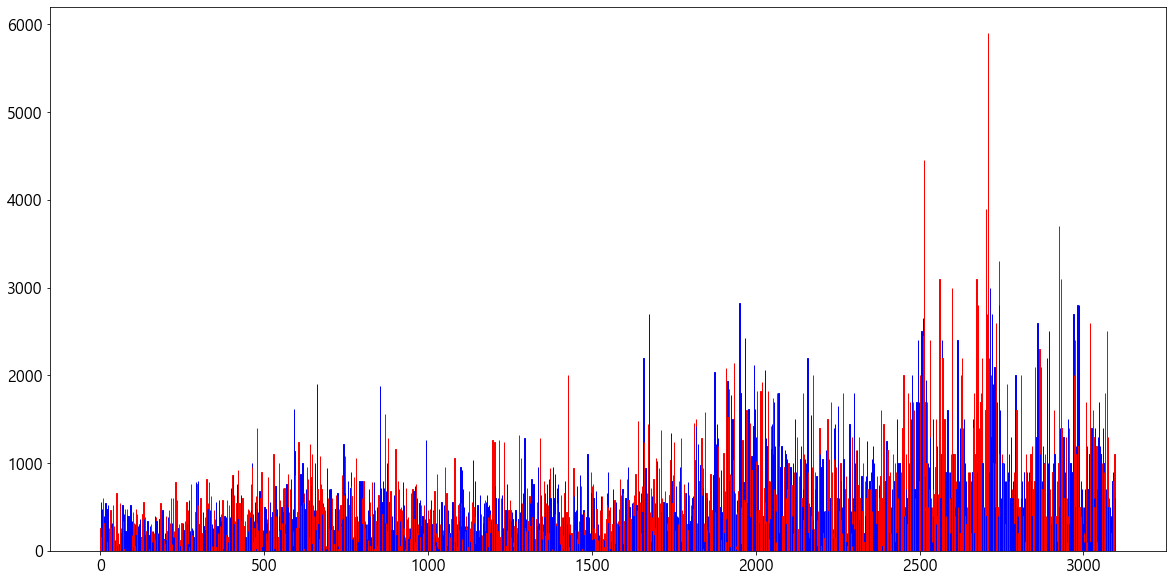

In [17]:
# 절대값을 구한다.
a2 = abs(a1)

a3 = plt.bar(range(len(a2)), a2.values)

# 가져온 막대 개수만큼 반복한다.
for idx, b1 in enumerate(a3):
    if a1[idx] > 0:
        b1.set_color('r')
    else:
        b1.set_color('b')

plt.show()

### 등락률 그래프

In [18]:
# pct_change : 이전 행의 결과와 비교하여 몇 퍼센트 등락을 했는지 계산한다.(0~1)
# 처음것은 이전 것이 없기 때문에 결측치가 나온다.
a1 = cel['종가'].pct_change()
a1

0            NaN
1       0.016069
2       0.023114
3      -0.033294
4       0.009840
          ...   
3092    0.005008
3093    0.013289
3094   -0.009836
3095    0.018212
3096   -0.009756
Name: 종가, Length: 3097, dtype: float64

In [19]:
# 곱하기 100을 해서 % 단위로 환산한다.
a100 = a1 * 100
a100

0            NaN
1       1.606922
2       2.311436
3      -3.329370
4       0.984010
          ...   
3092    0.500835
3093    1.328904
3094   -0.983607
3095    1.821192
3096   -0.975610
Name: 종가, Length: 3097, dtype: float64

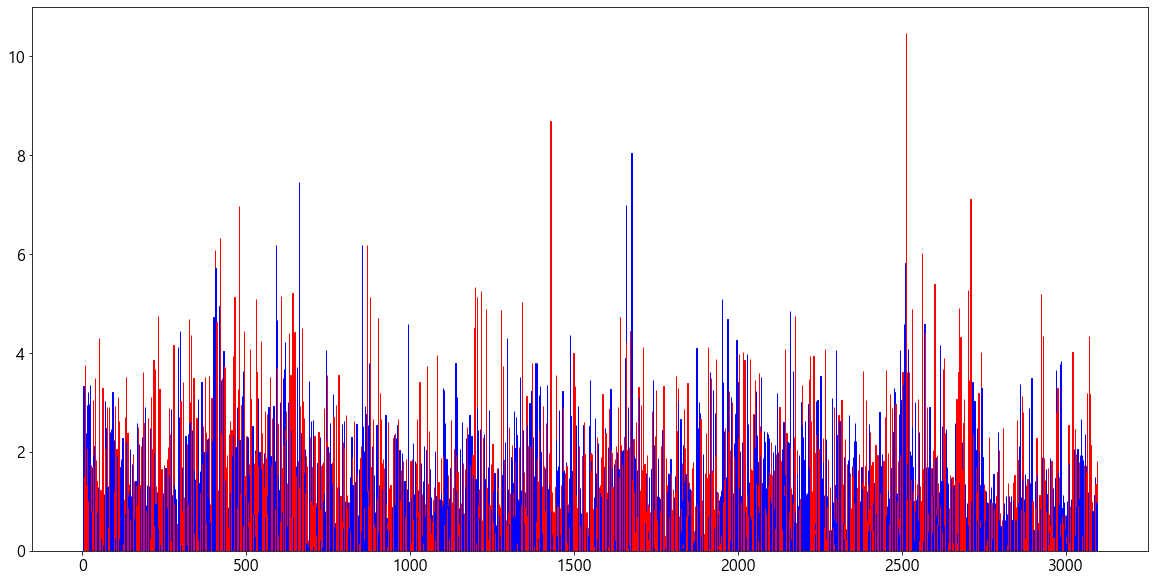

In [20]:
# 절대값을 구한다.
a2 = abs(a100)

a3 = plt.bar(range(len(a2)), a2.values)

# 가져온 막대 개수만큼 반복한다.
for idx, b1 in enumerate(a3):
    if a100[idx] > 0:
        b1.set_color('r')
    else:
        b1.set_color('b')

plt.show()

### 수익률에 대한 히스토그램

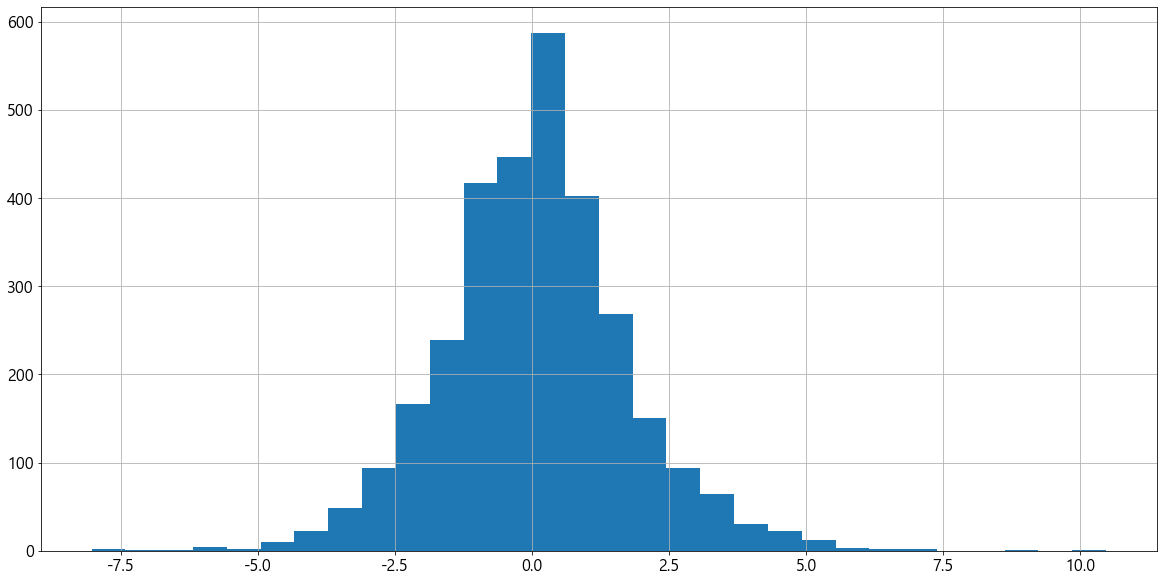

In [21]:
a100.hist(bins=30)
plt.show()

In [22]:
# 첨도
# 첨도가 0보다 크면 긴 꼬리를 갖고 분포가 중앙 부분에 덜 분포 되어 있는 것으로 해석한다.
a100.kurt()

1.6756174679839235

In [23]:
# 왜도
# 분포의 비대칭정도를 나타내는 값
# 왼쪽으로 꼬리가 길면 음수를 가지고 오른쪽으로 꼬리가 길면 양수를 갖는다.
# 0에 가까울 수록 데이터의 균형도가 높은 것으로 해석한다.
a100.skew()

0.20235929134644526